In [11]:
import numpy as np
import pandas as pd
import os
import csv
import requests
import json
import matplotlib.pyplot as plt
from scipy import ndimage

player_profile_folder = 'C:/Users/Jared/Documents/player_stats/'
p_name = 'Brad Marchand'
event = 'shots'
event2 = 'missed_shots'

In [12]:
# convert player name and event to lower case format, remove spaces and .
p_name = p_name.lower()
p_name = p_name.replace(' ','_')
p_name = p_name.replace('.','_')
event = event.lower()
event2 = event2.lower()

# define path to player stats
path = os.path.join(player_profile_folder+p_name)
print('Player: '+ p_name + ', Event: '+ event)
print(path)


Player: brad_marchand, Event: shots
C:/Users/Jared/Documents/player_stats/brad_marchand


In [13]:
# check if player stats exist
game_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(game_files)

['2019020613_brad_marchand.csv']


In [14]:
if game_files:
    for i in range(0,len(game_files)):
        with open(path+'/'+game_files[i], mode = 'r') as file:
            reader = csv.reader(file)
            contents_list = []
            for line in reader:
                contents_list.append(line)
        #print(contents_list)

In [15]:
ind_s = [x for x, s in enumerate(contents_list) if event in s[0]]
ind_s = ind_s[0]+1
# start from start index and look in remaining contents list for non-empty first column (indicates new category)
ind_e = [x for x, s in enumerate(contents_list[ind_s:]) if s[0]][0] + ind_s

coords = {} # store coordinates in dictionary
coords['x_target'] = []; coords['y_target'] = []

for i in range(ind_s,ind_e):
    coords['x_target'].append(float(contents_list[i][1]))
    coords['y_target'].append(float(contents_list[i][2]))

# convert to integers
coords['x_target'] = [int(i) for i in coords['x_target']] 
coords['y_target'] = [int(i) for i in coords['y_target']] 
print(coords['x_target'])
print(coords['y_target'])

[78]
[-1]


In [16]:
ind_s = [x for x, s in enumerate(contents_list) if event2 in s[0]]
ind_s = ind_s[0]+1
# start from start index and look in remaining contents list for non-empty first column (indicates new category)
ind_e = [x for x, s in enumerate(contents_list[ind_s:]) if s[0]][0] + ind_s 
print(ind_s)
print(ind_e)
# store coordinates in dictionary
coords['x_miss'] = []; coords['y_miss'] = []

for i in range(ind_s,ind_e):
    coords['x_miss'].append(float(contents_list[i][1]))
    coords['y_miss'].append(float(contents_list[i][2]))

# convert to integers
coords['x_miss'] = [int(i) for i in coords['x_miss']] 
coords['y_miss'] = [int(i) for i in coords['y_miss']] 
print(coords['x_miss'])
print(coords['y_miss'])


28
30
[67, 77]
[-3, 1]


In [17]:
# transform coordinates for plotting
# horizontal ice layout
# shots on target
coords['x_plot_full_target'] = (np.asarray(coords['x_target'])+100)
coords['y_plot_full_target'] = (np.asarray(coords['y_target']))
# missed shots
coords['x_plot_full_miss'] = (np.asarray(coords['x_miss'])+100)
coords['y_plot_full_miss'] = (np.asarray(coords['y_miss']))

# vertical half-ice layout with home plate
# shots on target
coords['x_plot_half_target'] = -1*(np.asarray(coords['y_target']))
coords['y_plot_half_target'] = (np.asarray(coords['x_target']))
# missed shots
coords['x_plot_half_miss'] = -1*(np.asarray(coords['y_miss']))
coords['y_plot_half_miss'] = (np.asarray(coords['x_miss']))

Text(137.5, 45, 'Away')

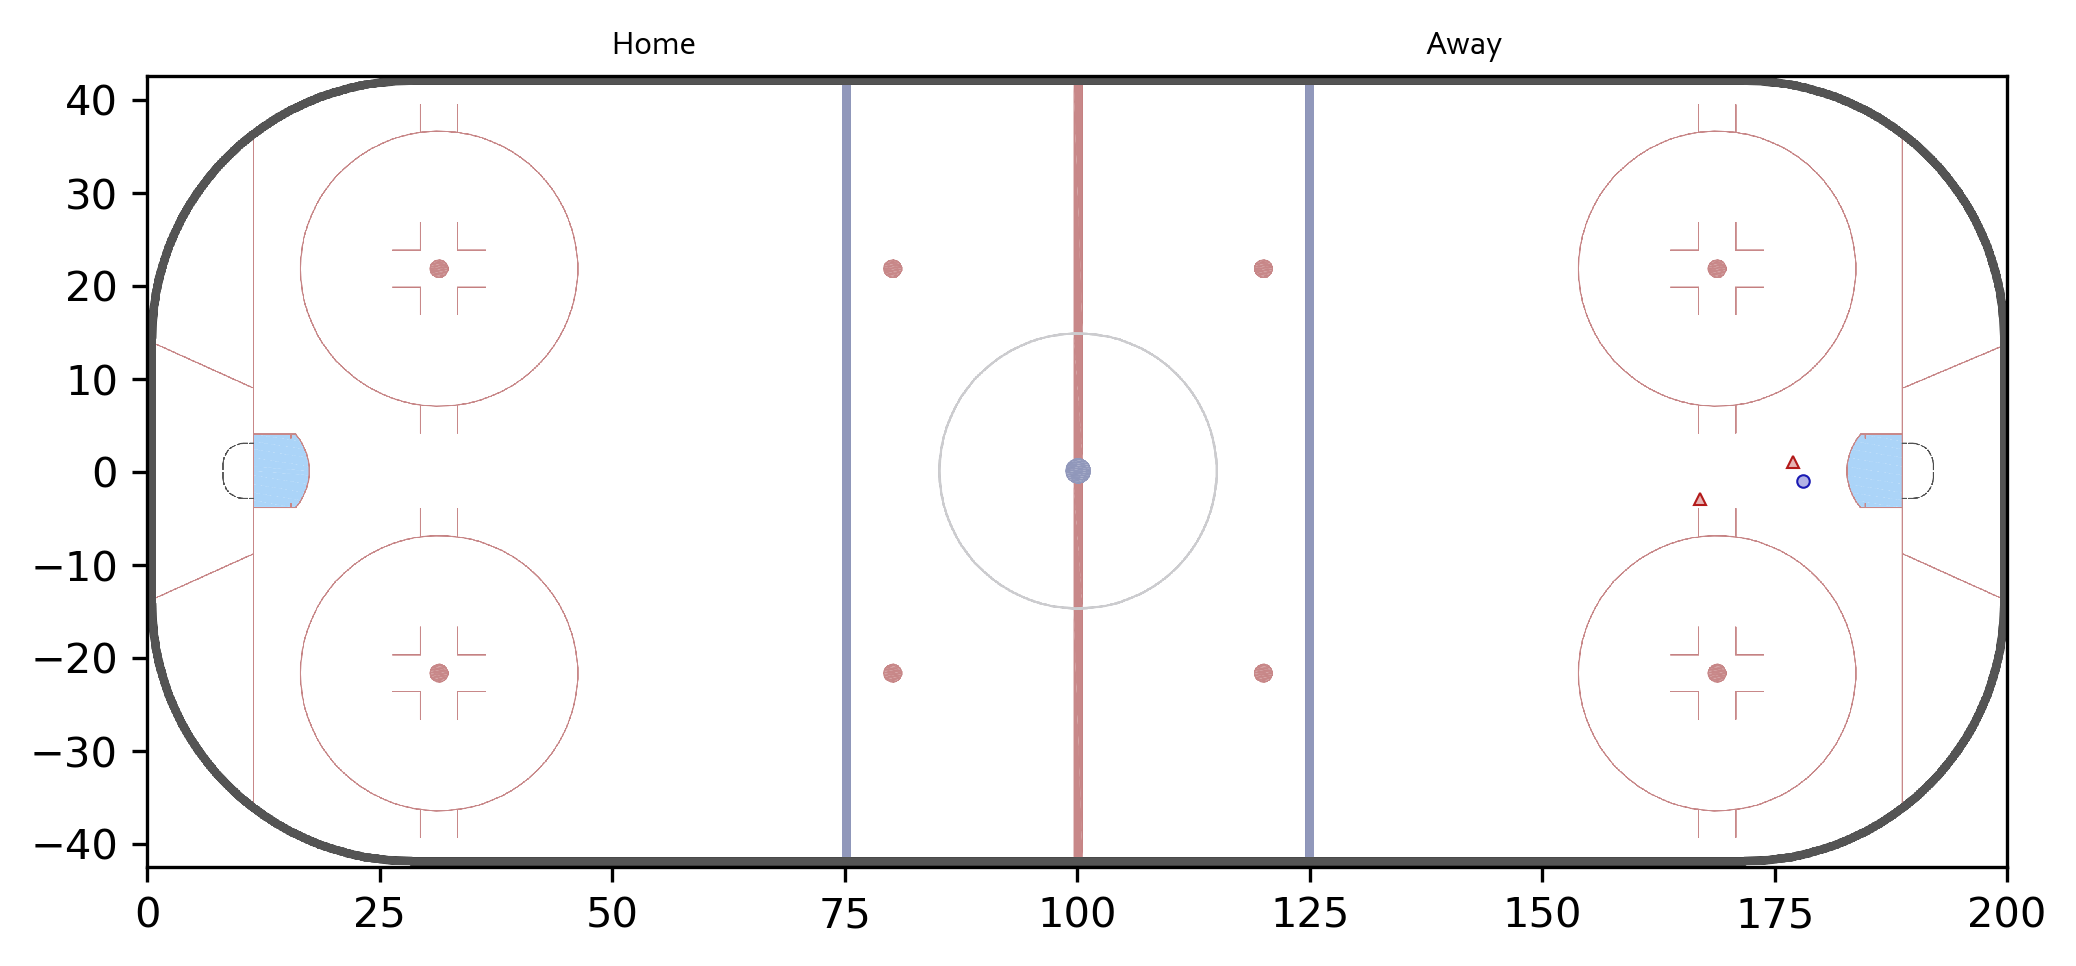

In [18]:
# plot results
# plot shots overlaid on rink image (home shots displayed on left, away shots on right)

# read in image of rink
img_full_rink = plt.imread("full_ice_scale_mm.png")

# define marker plot properties
marker_face_colour = np.array([0.7,0.7,0.9])
bg_colour = np.array([1,1,1])
marker_edge_colour = np.array([0.1,0.1,0.7])
marker_size = 3
marker_edge_width = 0.5

marker_face_colour_2 = np.array([0.9,0.7,0.7])
marker_edge_colour_2 = np.array([0.7,0.1,0.1])
#marker_size = 3
#marker_edge_width = 0.5

# plot shot results on full rink 
fig, ax = plt.subplots(figsize = (8,8), dpi=300, facecolor = bg_colour)
ax.imshow(img_full_rink,extent=[0, 200, -42.5, 42.5])

plt.plot(coords['x_plot_full_target'],coords['y_plot_full_target'],ls = '', marker = 'o', markersize = marker_size, 
         c = marker_face_colour, markeredgecolor = marker_edge_colour, mew = marker_edge_width,
         label= p_name+': Shots on Target')
plt.plot(coords['x_plot_full_miss'],coords['y_plot_full_miss'],ls = '', marker = '^', markersize = marker_size, 
         c = marker_face_colour_2, markeredgecolor = marker_edge_colour_2, mew = marker_edge_width,
         label= p_name+': Missed shots')
#plt.axis('off')
plt.text(50, 45, 'Home ', fontname = 'Corbel', fontsize = 8)
plt.text(137.5, 45, 'Away', fontname = 'Corbel', fontsize = 8)
#L = plt.legend(ncol = 2,loc='lower center', bbox_to_anchor = (0.5,-0.35), edgecolor = (0.4,0.4,0.4), fontsize = 8)
#plt.setp(L.texts, family='Corbel')
#plt.savefig('ShotChart_BOSvsNJD_12312019.png', dpi=800)




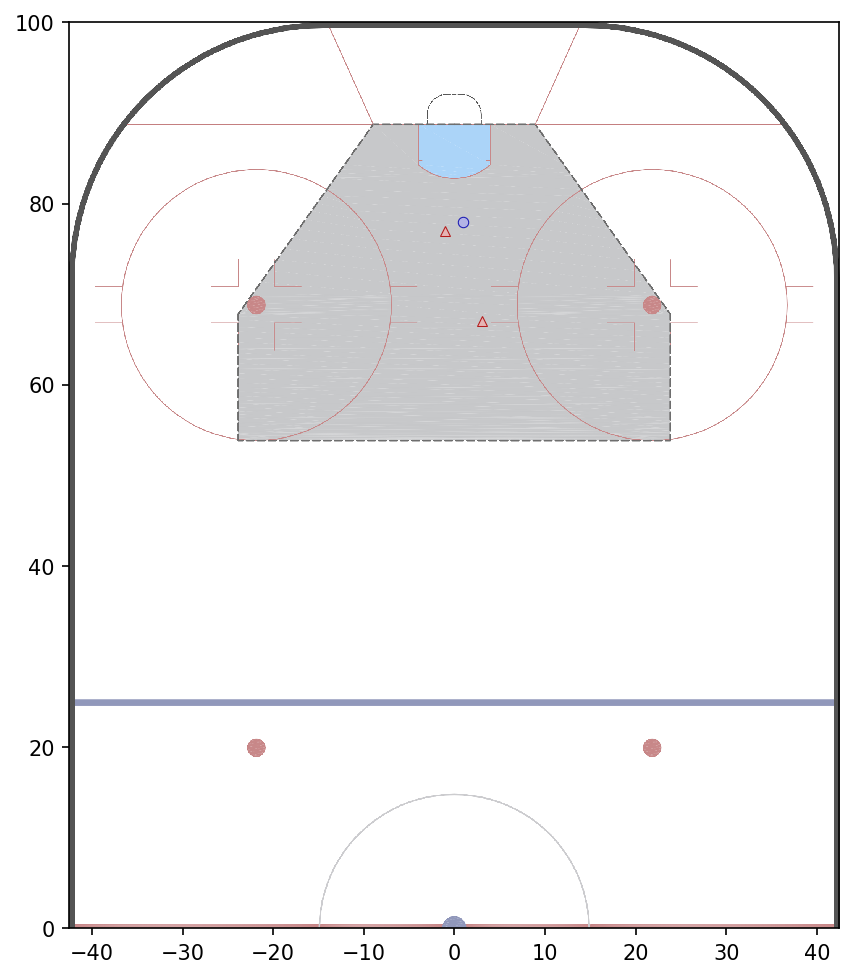

In [19]:
# read in image of half rink with home plate overlay
img_half_rink_hp = plt.imread("half_ice_w_home_plate_scale_mm.png")

# define marker plot properties
marker_face_colour = np.array([0.7,0.7,0.9])
bg_colour = np.array([1,1,1])
marker_edge_colour = np.array([0.1,0.1,0.7])
marker_size = 5
marker_edge_width = 0.5

fig, ax = plt.subplots(figsize = (8,8), dpi = 150, facecolor = bg_colour)
ax.imshow(img_half_rink_hp,extent=[-42.5, 42.5, 0, 100])
plt.plot(coords['x_plot_half_target'],coords['y_plot_half_target'],ls = '', marker = 'o', markersize = marker_size, 
         c = marker_face_colour, markeredgecolor = marker_edge_colour, mew = marker_edge_width,
         label= p_name+': Shots on Target')

plt.plot(coords['x_plot_half_miss'],coords['y_plot_half_miss'],ls = '', marker = '^', markersize = marker_size, 
         c = marker_face_colour_2, markeredgecolor = marker_edge_colour_2, mew = marker_edge_width,
         label= p_name+': Shots on Target')
#plt.axis('off')